Gapminder Exploratory Data Analysis Activity

In [1]:
import pandas as pd
import numpy as np


In [2]:
#Read in csv data to create DataFrame (NOTE: this is a tsv file)
#from https://github.com/chendaniely/pandas_for_everyone/blob/master/data/gapminder.tsv
df = pd.read_csv('gapminder.tsv', sep = '\t')
#Just run this cell

In [3]:
#Peek at the head of the df
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
#Return the number of rows and columns as a tuple
df.shape

(1704, 6)

In [5]:
#Check on the data types
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [6]:
#View only the last item using the iloc method. Make it general for any DataFrame. (no magic numbers)
df.iloc[-1]

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [7]:
#View the last row using the loc method. Make it general for any DataFrame.
df.loc[df.index[-1]]

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [8]:
#Output only rows 0, 100, 200, 300...
df.iloc[::100]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
200,Burkina Faso,Africa,1992,50.260,8878303,931.752773
300,Colombia,Americas,1952,50.643,12350771,2144.115096
400,Czech Republic,Europe,1972,70.290,9862158,13108.453600
500,Eritrea,Africa,1992,49.991,3668440,582.858510
600,Guatemala,Americas,1952,42.023,3146381,2428.237769
700,India,Asia,1972,50.651,567000000,724.032527
800,Japan,Asia,1992,79.360,124329269,26824.895110
900,Libya,Africa,1952,42.723,1019729,2387.548060


In [9]:
# Average life expectancy in 1972 compared between continents
df[df['year'] == 1972].groupby('continent')['lifeExp'].mean()

continent
Africa      47.450942
Americas    62.394920
Asia        57.319269
Europe      70.775033
Oceania     71.910000
Name: lifeExp, dtype: float64

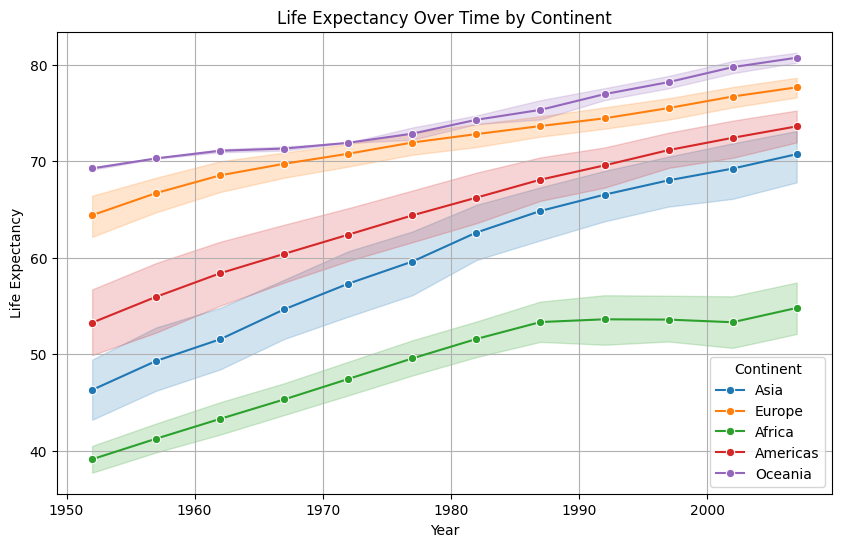

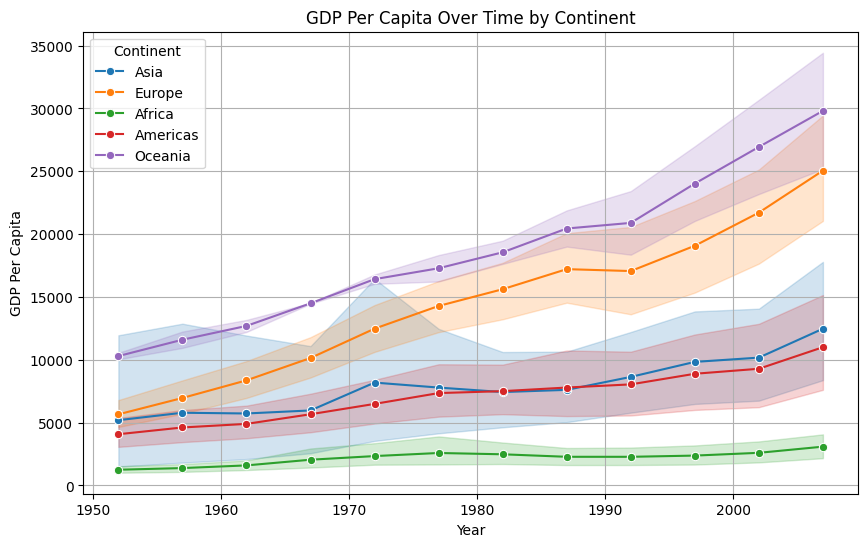

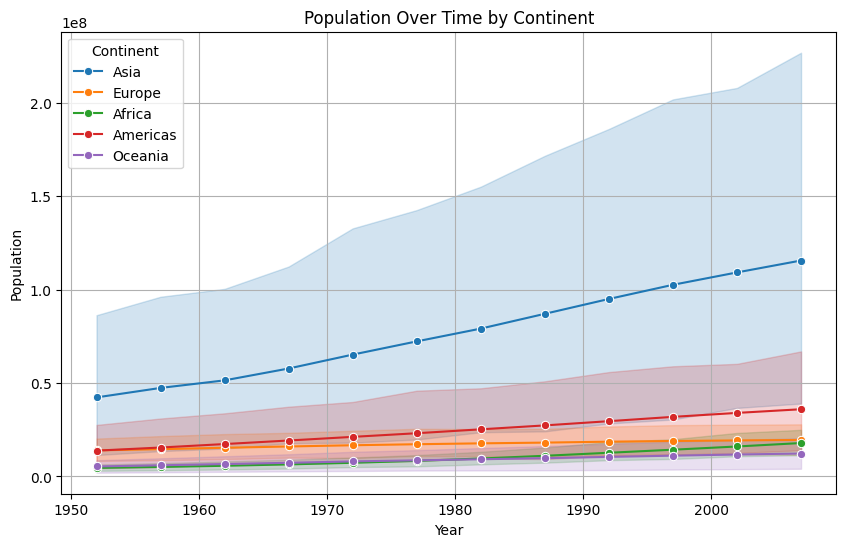

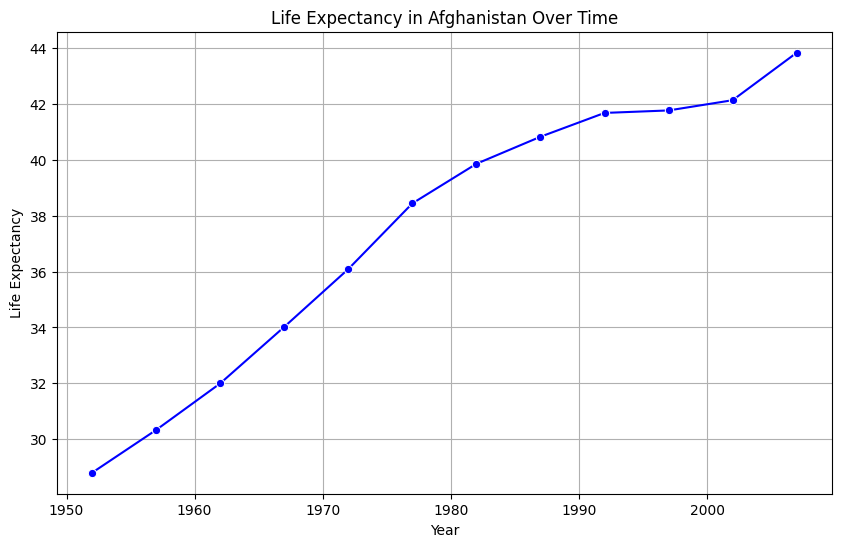

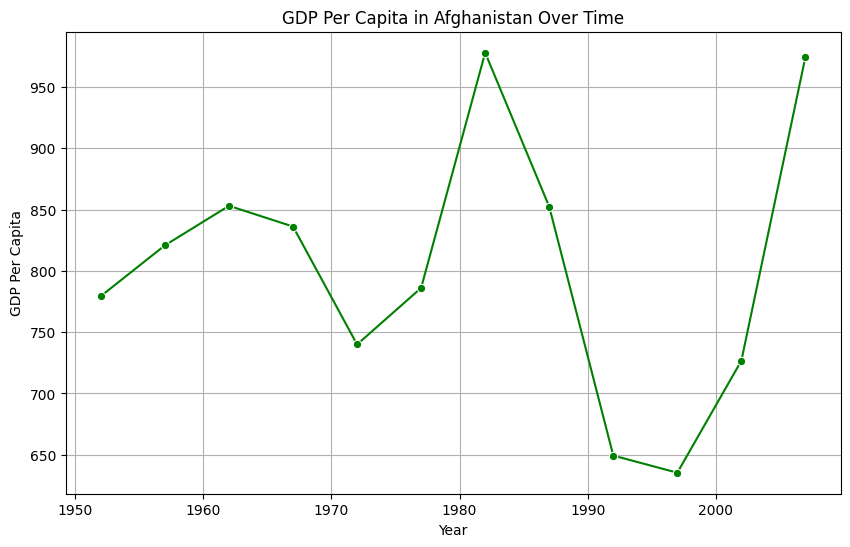

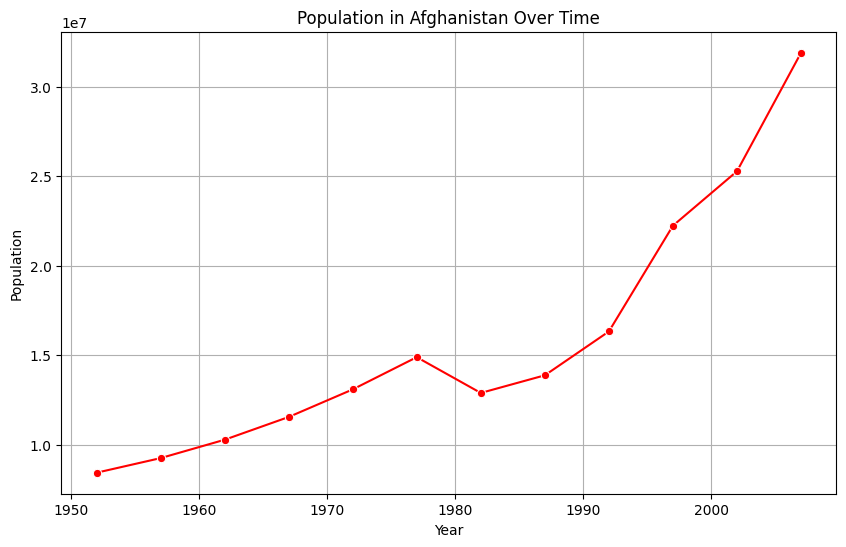

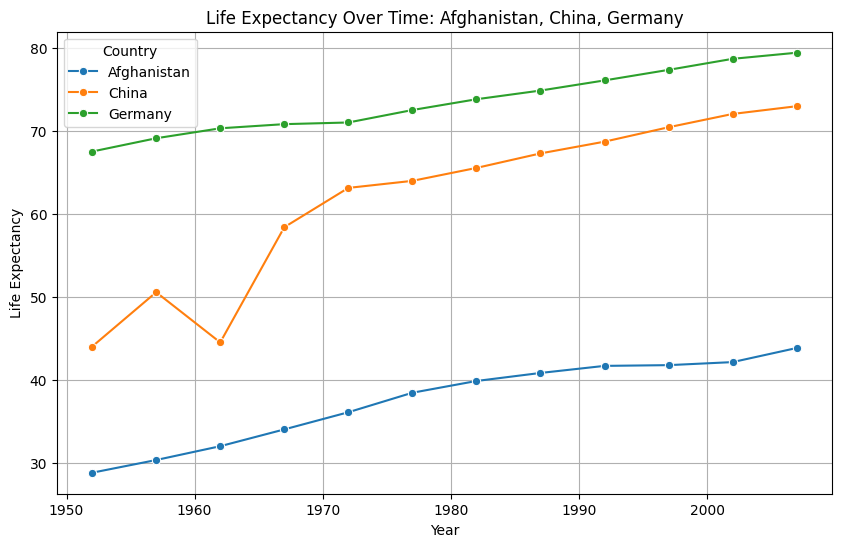

In [19]:
# Generate visualizations based on the data
import matplotlib.pyplot as plt
import seaborn as sns

# lot life expectancy over time for all continents
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='year', y='lifeExp', hue='continent', marker='o')
plt.title('Life Expectancy Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Continent')
plt.grid()
plt.show()

# Plot GDP per capita over time for all continents
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='year', y='gdpPercap', hue='continent', marker='o')
plt.title('GDP Per Capita Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.legend(title='Continent')
plt.grid()
plt.show()

# Plot population over time for all continents
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='year', y='pop', hue='continent', marker='o')
plt.title('Population Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Continent')
plt.grid()
plt.show()

# Plot life expectancy for Afghanistan over time
plt.figure(figsize=(10,6))
sns.lineplot(data=df[df['country'] == 'Afghanistan'], x='year', y='lifeExp', marker='o', color='blue')
plt.title('Life Expectancy in Afghanistan Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid()
plt.show()

# Plot GDP per capita for Afghanistan over time
plt.figure(figsize=(10,6))
sns.lineplot(data=df[df['country'] == 'Afghanistan'], x='year', y='gdpPercap', marker='o', color='green')
plt.title('GDP Per Capita in Afghanistan Over Time')
plt.xlabel('Year')
plt.ylabel('GDP Per Capita')
plt.grid()
plt.show()

# Plot population for Afghanistan over time
plt.figure(figsize=(10,6))
sns.lineplot(data=df[df['country'] == 'Afghanistan'], x='year', y='pop', marker='o', color='red')
plt.title('Population in Afghanistan Over Time')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid()
plt.show()

# Plot life expectancy for Afghanistan, China, and Germany over time as three plots within same figure
plt.figure(figsize=(10,6))
sns.lineplot(data=df[df['country'].isin(['Afghanistan', 'China', 'Germany'])], x='year', y='lifeExp', hue='country', marker='o')
plt.title('Life Expectancy Over Time: Afghanistan, China, Germany')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Country')
plt.grid()
plt.show()

# Output previous graph as a pdf file
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('gapminder_plots.pdf') as pdf:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=df[df['country'].isin(['Afghanistan', 'China', 'Germany'])], x='year', y='lifeExp', hue='country', marker='o')
    plt.title('Life Expectancy Over Time: Afghanistan, China, Germany')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.legend(title='Country')
    plt.grid()
    pdf.savefig()
    plt.close()

/var/folders/jz/3xfrhl_s16sf9qq9ny5gl3qh0000gn/T/ipykernel_46208/154046578.py:50: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title='', loc='best')


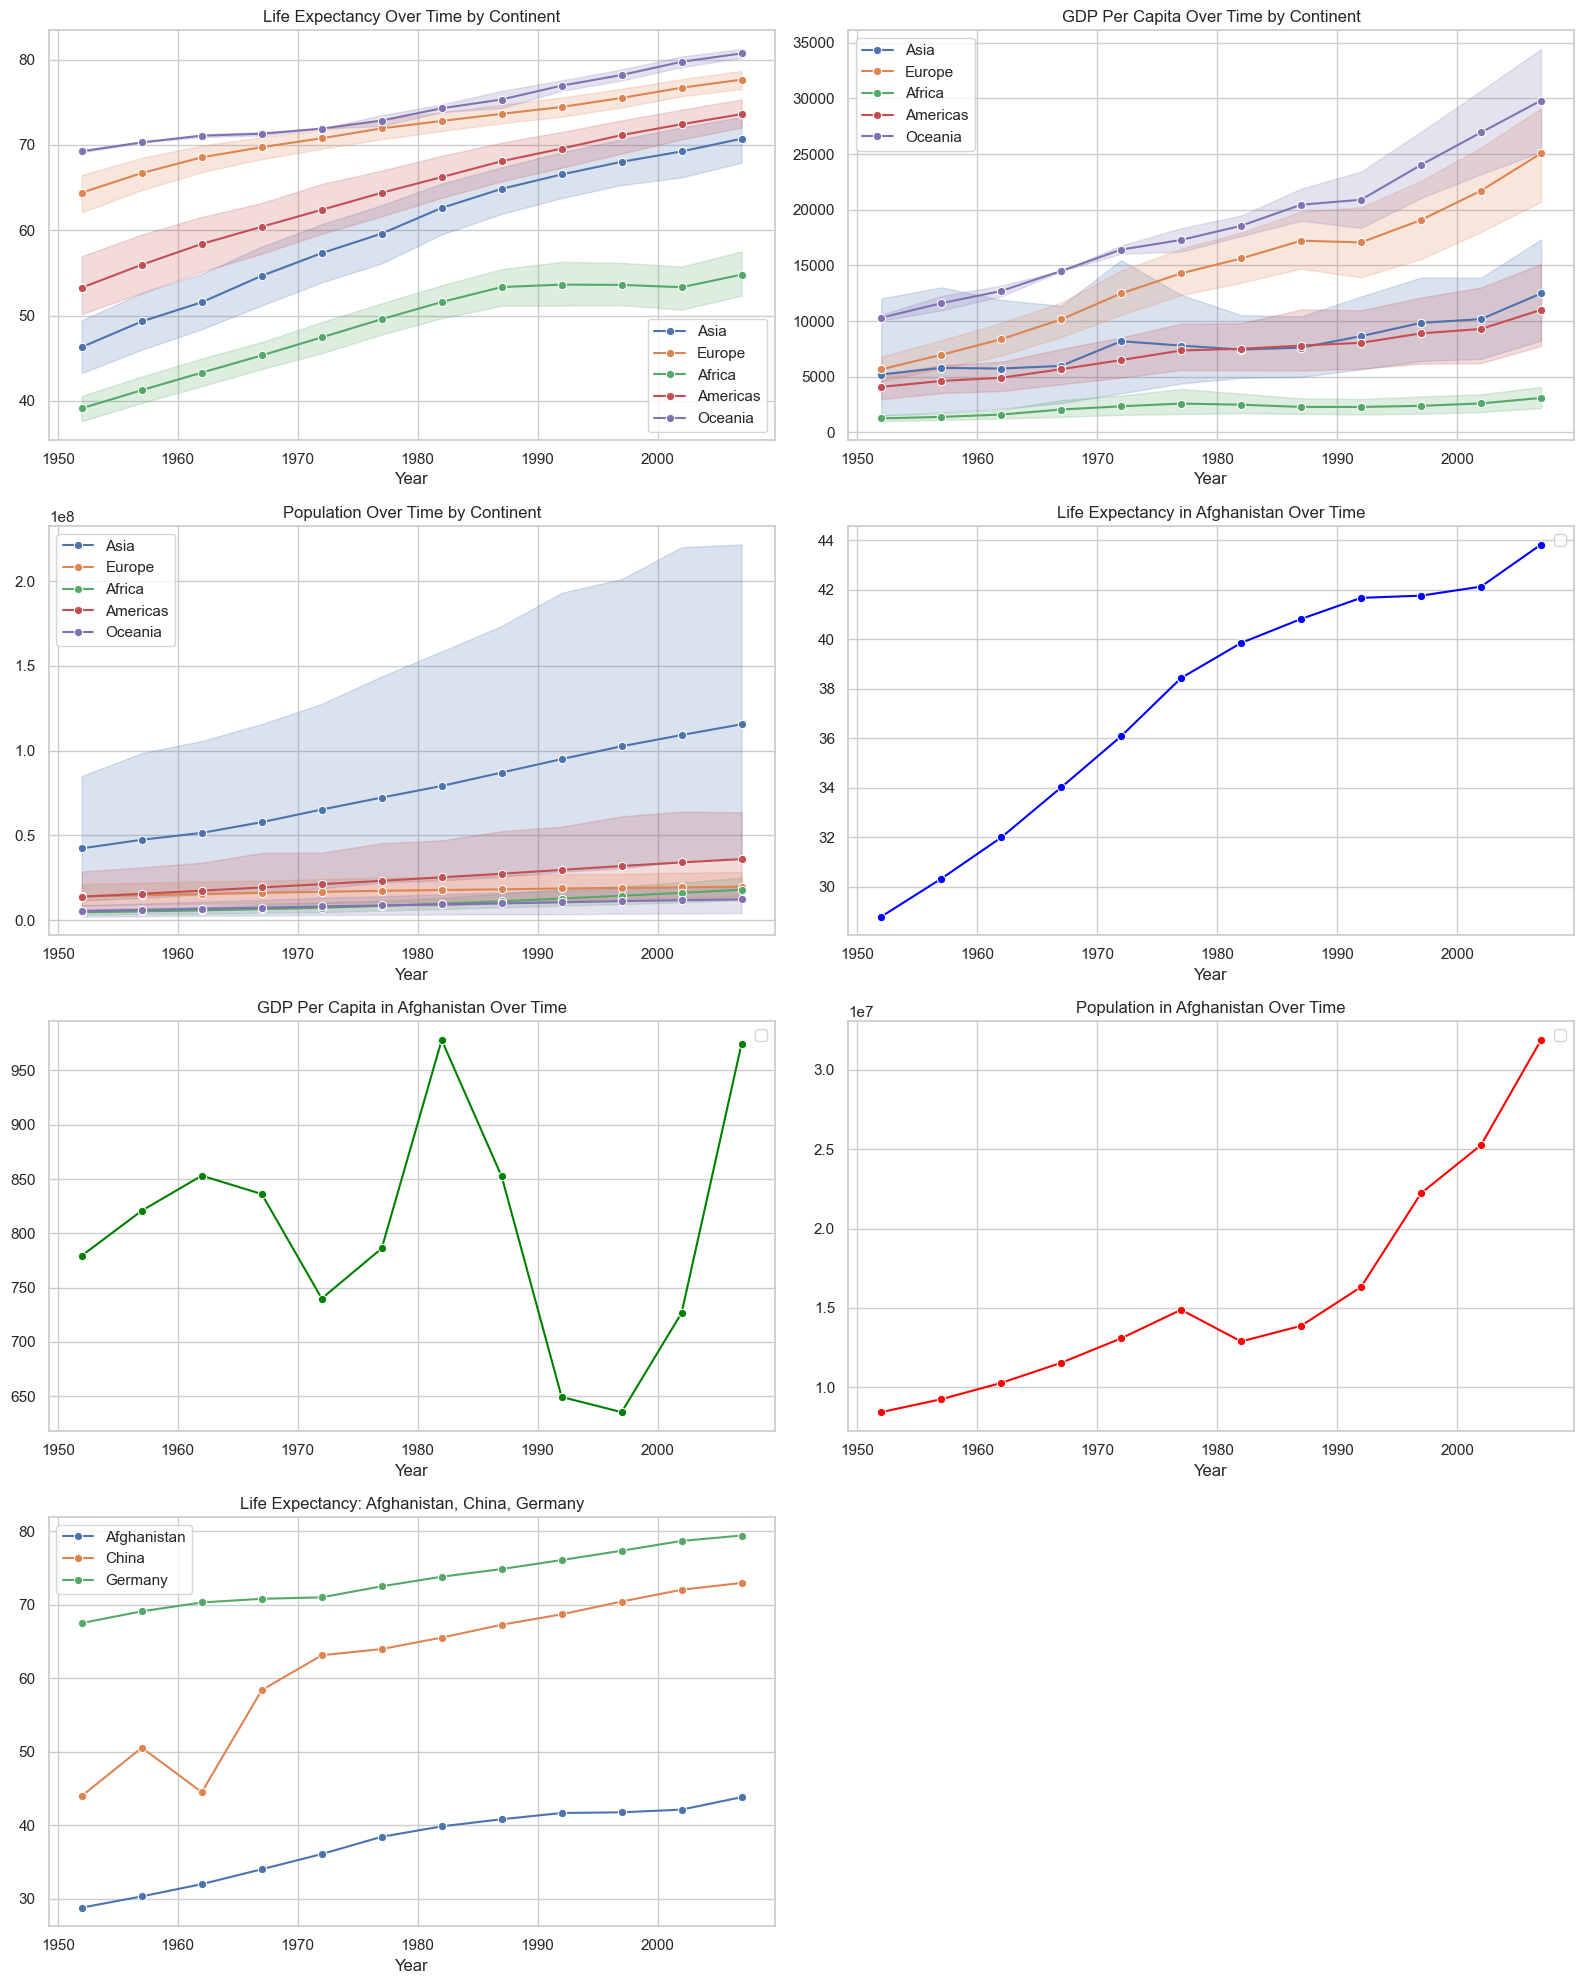

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Set a consistent style
sns.set(style='whitegrid')

# Create a figure with multiple subplots
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.flatten()  # Flatten axes array for easier indexing

# Plot 1: Life expectancy over time by continent
sns.lineplot(data=df, x='year', y='lifeExp', hue='continent', marker='o', ax=axes[0])
axes[0].set_title('Life Expectancy Over Time by Continent')

# Plot 2: GDP per capita over time by continent
sns.lineplot(data=df, x='year', y='gdpPercap', hue='continent', marker='o', ax=axes[1])
axes[1].set_title('GDP Per Capita Over Time by Continent')

# Plot 3: Population over time by continent
sns.lineplot(data=df, x='year', y='pop', hue='continent', marker='o', ax=axes[2])
axes[2].set_title('Population Over Time by Continent')

# Plot 4: Life expectancy in Afghanistan
sns.lineplot(data=df[df['country'] == 'Afghanistan'], x='year', y='lifeExp', marker='o', color='blue', ax=axes[3])
axes[3].set_title('Life Expectancy in Afghanistan Over Time')

# Plot 5: GDP per capita in Afghanistan
sns.lineplot(data=df[df['country'] == 'Afghanistan'], x='year', y='gdpPercap', marker='o', color='green', ax=axes[4])
axes[4].set_title('GDP Per Capita in Afghanistan Over Time')

# Plot 6: Population in Afghanistan
sns.lineplot(data=df[df['country'] == 'Afghanistan'], x='year', y='pop', marker='o', color='red', ax=axes[5])
axes[5].set_title('Population in Afghanistan Over Time')

# Plot 7: Life expectancy in Afghanistan, China, and Germany
sns.lineplot(
    data=df[df['country'].isin(['Afghanistan', 'China', 'Germany'])],
    x='year', y='lifeExp', hue='country', marker='o', ax=axes[6]
)
axes[6].set_title('Life Expectancy: Afghanistan, China, Germany')

# Hide any unused subplot (if you have an 8th slot)
fig.delaxes(axes[7])

# Adjust layout
for ax in axes:
    ax.set_xlabel('Year')
    ax.set_ylabel('')
    ax.legend(title='', loc='best')

fig.tight_layout()
plt.show()

# Optional: Save as a single PDF
with PdfPages('combined_gapminder_plots.pdf') as pdf:
    pdf.savefig(fig)